データ可視化を行うノートブック

In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

In [25]:
train_df = pd.read_csv('./data/train.csv')
train_df.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


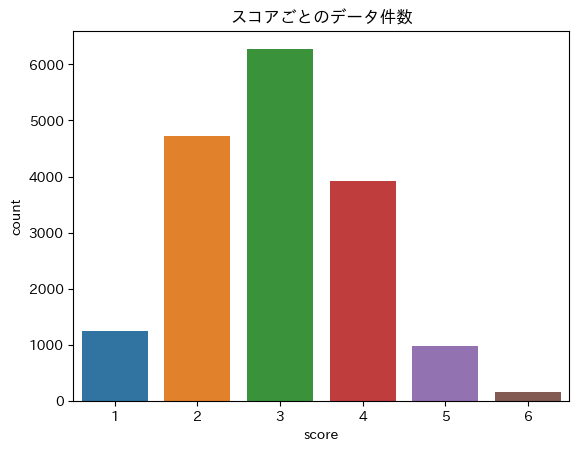

In [26]:
fig,ax = plt.subplots()
sns.countplot(x='score',data=train_df,ax=ax)
ax.set_title('スコアごとのデータ件数')
plt.show()

In [27]:
train_df['text_len'] = train_df.full_text.str.len()
train_df.head()

,essay_id,full_text,score,text_len
0,000d118,Many people have car where they live. The thin...,3,2677
1,000fe60,I am a scientist at NASA that is discussing th...,3,1669
2,001ab80,People always wish they had the same technolog...,4,3077
3,001bdc0,"We all heard about Venus, the planet without a...",4,2701
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2208


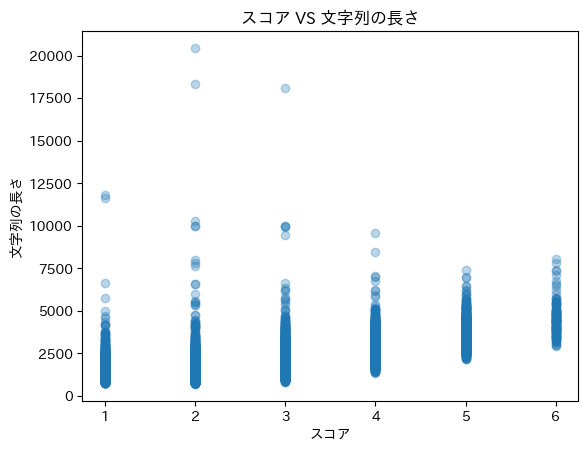

In [28]:
#文章が長いほどスコアが高いのではないか
fig,ax = plt.subplots()
ax.scatter(train_df.score,train_df.text_len,alpha=0.3)
ax.set_xlabel('スコア')
ax.set_ylabel('文字列の長さ')
ax.set_title('スコア VS 文字列の長さ')
plt.show()

・文字列と長さは無相関に見える

In [29]:
train_df['space_count'] = train_df.full_text.str.count(' ')
train_df['word_len_avg'] = (train_df.text_len - train_df.space_count) / (train_df.space_count + 1)
train_df.head()

,essay_id,full_text,score,text_len,space_count,word_len_avg
0,000d118,Many people have car where they live. The thin...,3,2677,496,4.388330
1,000fe60,I am a scientist at NASA that is discussing th...,3,1669,327,4.091463
2,001ab80,People always wish they had the same technolog...,4,3077,555,4.535971
3,001bdc0,"We all heard about Venus, the planet without a...",4,2701,446,5.044743
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2208,380,4.797900


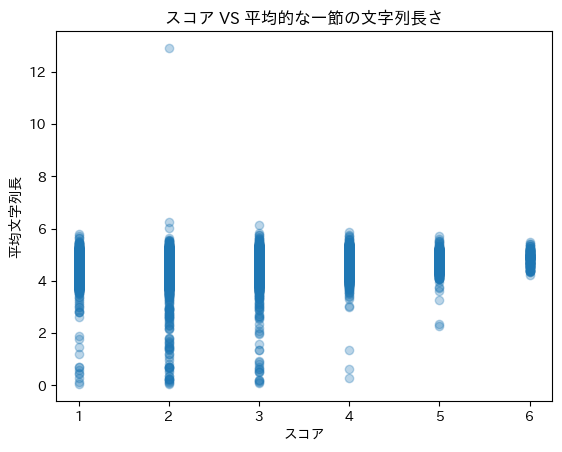

In [30]:
#一節が長めだとスコアが高いのではないか？
fig, ax = plt.subplots()
ax.scatter(train_df.score,train_df.word_len_avg,alpha=0.3)
ax.set_title('スコア VS 平均的な一節の文字列長さ')
ax.set_xlabel('スコア')
ax.set_ylabel('平均文字列長')
plt.show()

In [31]:
#「I」で始まる小論文は自分が足りでスコアが低いのではないか
train_df['I-cnt'] = train_df.full_text.str.startswith('I') + train_df.full_text.str.count('. I ')
train_df.head()

,essay_id,full_text,score,text_len,space_count,word_len_avg,I-cnt
0,000d118,Many people have car where they live. The thin...,3,2677,496,4.388330,1
1,000fe60,I am a scientist at NASA that is discussing th...,3,1669,327,4.091463,2
2,001ab80,People always wish they had the same technolog...,4,3077,555,4.535971,0
3,001bdc0,"We all heard about Venus, the planet without a...",4,2701,446,5.044743,0
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,2208,380,4.797900,2


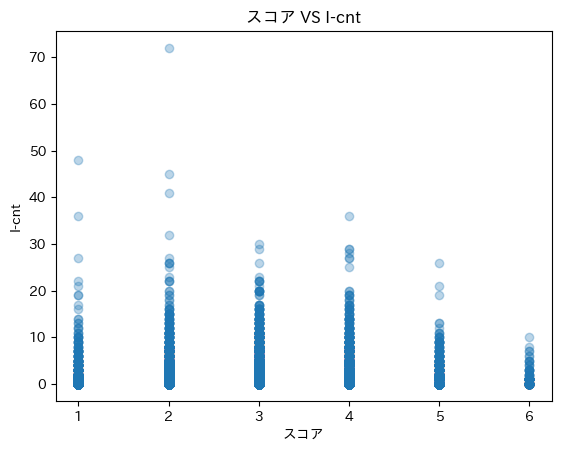

In [32]:
fig,ax = plt.subplots()
ax.scatter(train_df.score,train_df['I-cnt'],alpha=0.3)
ax.set_title('スコア VS I-cnt')
ax.set_xlabel('スコア')
ax.set_ylabel('I-cnt')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


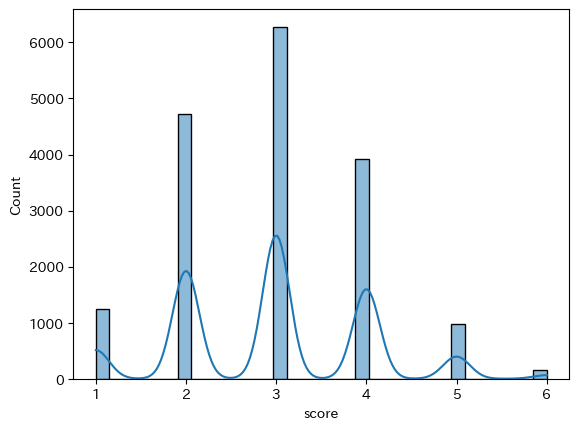

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


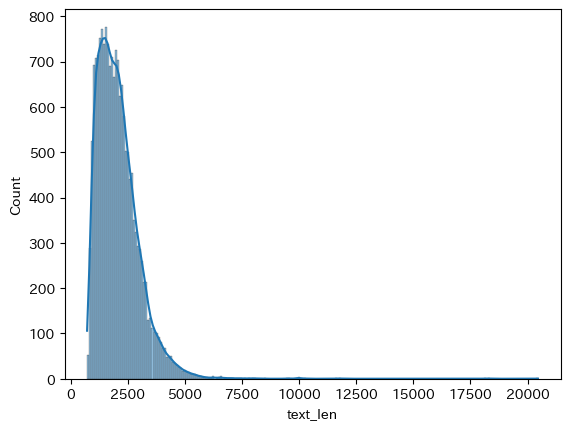

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


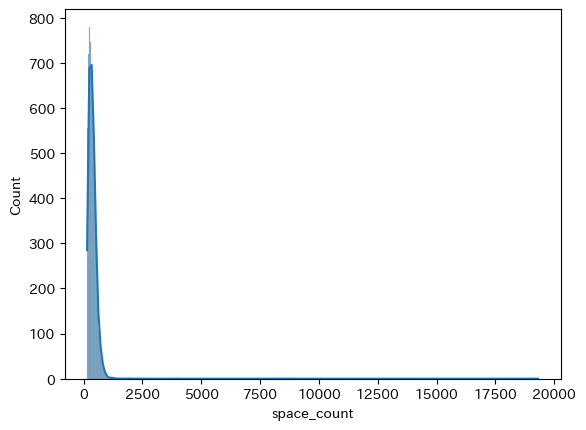

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


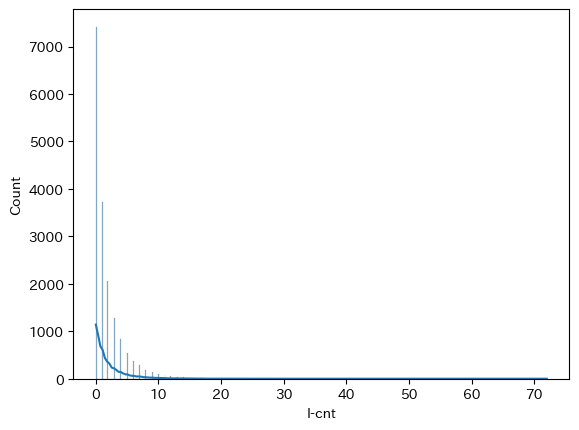

In [21]:
for feature in train_df.select_dtypes(include=int).columns:
    sns.histplot(x=feature,data=train_df,kde=True)
    plt.show()

In [25]:
train_df['log_text_len'] = np.log(train_df.text_len)
train_df['log_space_count'] = np.log(train_df.space_count)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


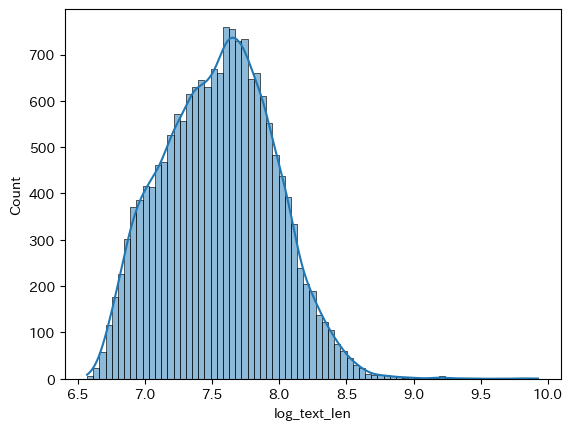

In [29]:
sns.histplot(x='log_text_len', data=train_df,kde=True)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


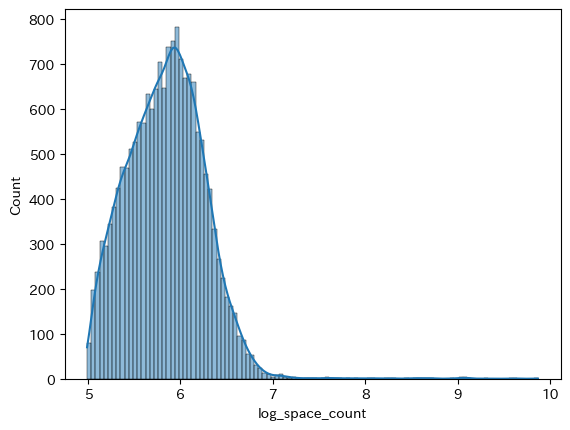

In [30]:
sns.histplot(x='log_space_count',data=train_df,kde=True)
plt.show()